In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import os
# Load the image
img = cv2.imread('dies.png')
img_rotated = []
img_degree = []
for angle in range(15,-15,-5):
    img_rotated.append(imutils.rotate(img, angle=angle))
    img_degree.append(angle)

tresh_array = []
for new_img in img_rotated:
    # convert to grayscale
    gray = cv2.cvtColor(new_img,cv2.COLOR_BGR2GRAY)
    # smooth the image to avoid noises
    gray = cv2.medianBlur(gray,5)
    # Apply adaptive threshold
    thresh = cv2.adaptiveThreshold(gray, 255, 1, 1, 11, 2)
    thresh_color = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
    # apply some dilation and erosion to join the gaps
    kernel = np.ones((8,8), np.uint8)
    thresh = cv2.dilate(thresh, kernel ,iterations = 2)
    thresh = cv2.erode(thresh, kernel, iterations = 2)
    tresh_array.append(thresh)


In [14]:
def compare(images):
    fig=plt.figure(figsize=(5,10))
    n_images = len(images)
    i=1
    for key, value in images.items():
        fig.add_subplot(1, n_images, i)
        plt.title(key)
        plt.imshow(value,cmap='gray')
        i+=1

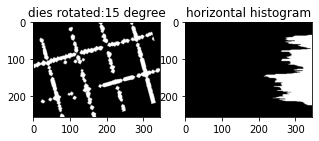

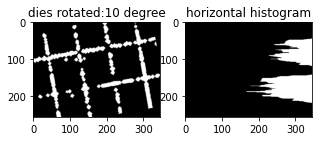

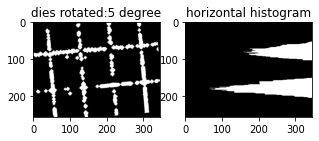

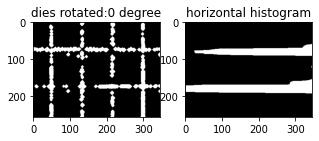

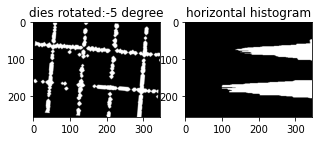

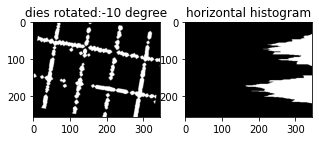

In [15]:
for i in range(len(img_rotated)):
    # Width and heigth the image
    height, width = tresh_array[i].shape
    # Sum the value lines 
    horizontal_px = np.sum(tresh_array[i], axis=1)
    # Normalize
    normalize = horizontal_px/255
    # create a black image with zeros 
    blankImage = np.zeros_like(tresh_array[i])
    # Make the horizontal projection histogram
    for idx, value in enumerate(normalize):
        cv2.line(blankImage, (idx, 0), (idx, width-int(value)), (255,255,255), 1)

    hist = cv2.resize(np.rot90(255-blankImage[:,0:height],1),(width,height))
    images = { "dies rotated:"+str(img_degree[i])+" degree":img_rotated[i],
            "horizontal histogram": hist
            }
    compare(images)